## Libraries

In [1]:
import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics



## Data Overview

### Exploratory Analysis

In [2]:
df = pd.read_csv('liedetector.csv')

In [3]:
df.head(3)

,X1,X2,X3,X4,X5,X6
0,P_001,3.6216,8.6661,-2.8073,-0.44699,0
1,P_002,4.5459,8.1674,-2.4586,-1.46210,0
2,P_003,3.8660,-2.6383,1.9242,0.10645,0


In [5]:
df.tail(3)

,X1,X2,X3,X4,X5,X6
1369,P_1370,-3.7503,-13.45860,17.5932,-2.7771,0
1370,P_1371,-3.5637,-8.38270,12.3930,-1.2823,0
1371,P_1372,-2.5419,-0.65804,2.6842,1.1952,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1372 non-null   object 
 1   X2      1372 non-null   float64
 2   X3      1372 non-null   float64
 3   X4      1372 non-null   float64
 4   X5      1372 non-null   float64
 5   X6      1372 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,1372,1372,P_001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,1372.0,NaN,NaN,NaN,0.433665,2.842766,-7.0421,-1.773,0.49618,2.821475,6.8248
X3,1372.0,NaN,NaN,NaN,1.922353,5.869047,-13.7731,-1.7082,2.31965,6.814625,12.9516
X4,1372.0,NaN,NaN,NaN,1.397627,4.31003,-5.2861,-1.574975,0.61663,3.17925,17.9274
X5,1372.0,NaN,NaN,NaN,-1.191657,2.101013,-8.5482,-2.41345,-0.58665,0.39481,2.4495
X6,1372.0,NaN,NaN,NaN,0.406706,0.491398,0.0,0.0,0.0,1.0,1.0


There are no null values

### Value Counts

In [13]:
len(df['X1'].unique())

1372

In [14]:
df['X1'].unique()

array(['P_001', 'P_002', 'P_003', ..., 'P_1370', 'P_1371', 'P_1372'],
      dtype=object)

X1 seems to be ID. hence can be dropped for regression model

### Duplicates

In [15]:
df.duplicated().sum()

0

No duplicates.

### Target Count

In [16]:
df.X6.value_counts()

0    814
1    558
Name: X6, dtype: int64

The data is not so skewed by eye-balling it. Also, target variable is already nominal. Binary logistic regression is enough since only 0s & 1s.

### Uni/Bi variate analysis (Fix)

In [ ]:
df.drop(['X1'], axis=1, inplace=True)

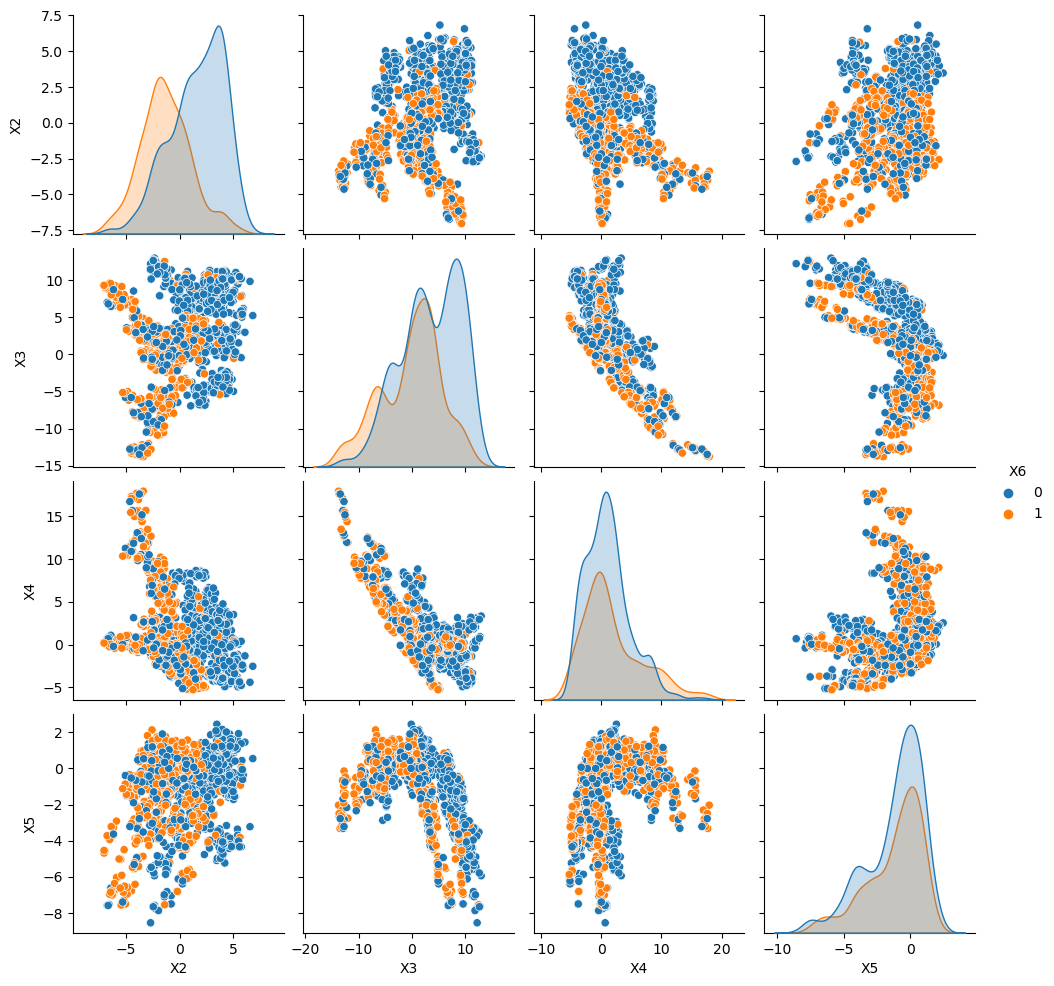

In [20]:
sns.pairplot(df, hue='X6', diag_kind='kde');

Except 'X2', remianing columns are totally eclipsed betwene red and blue features.

### Outliers

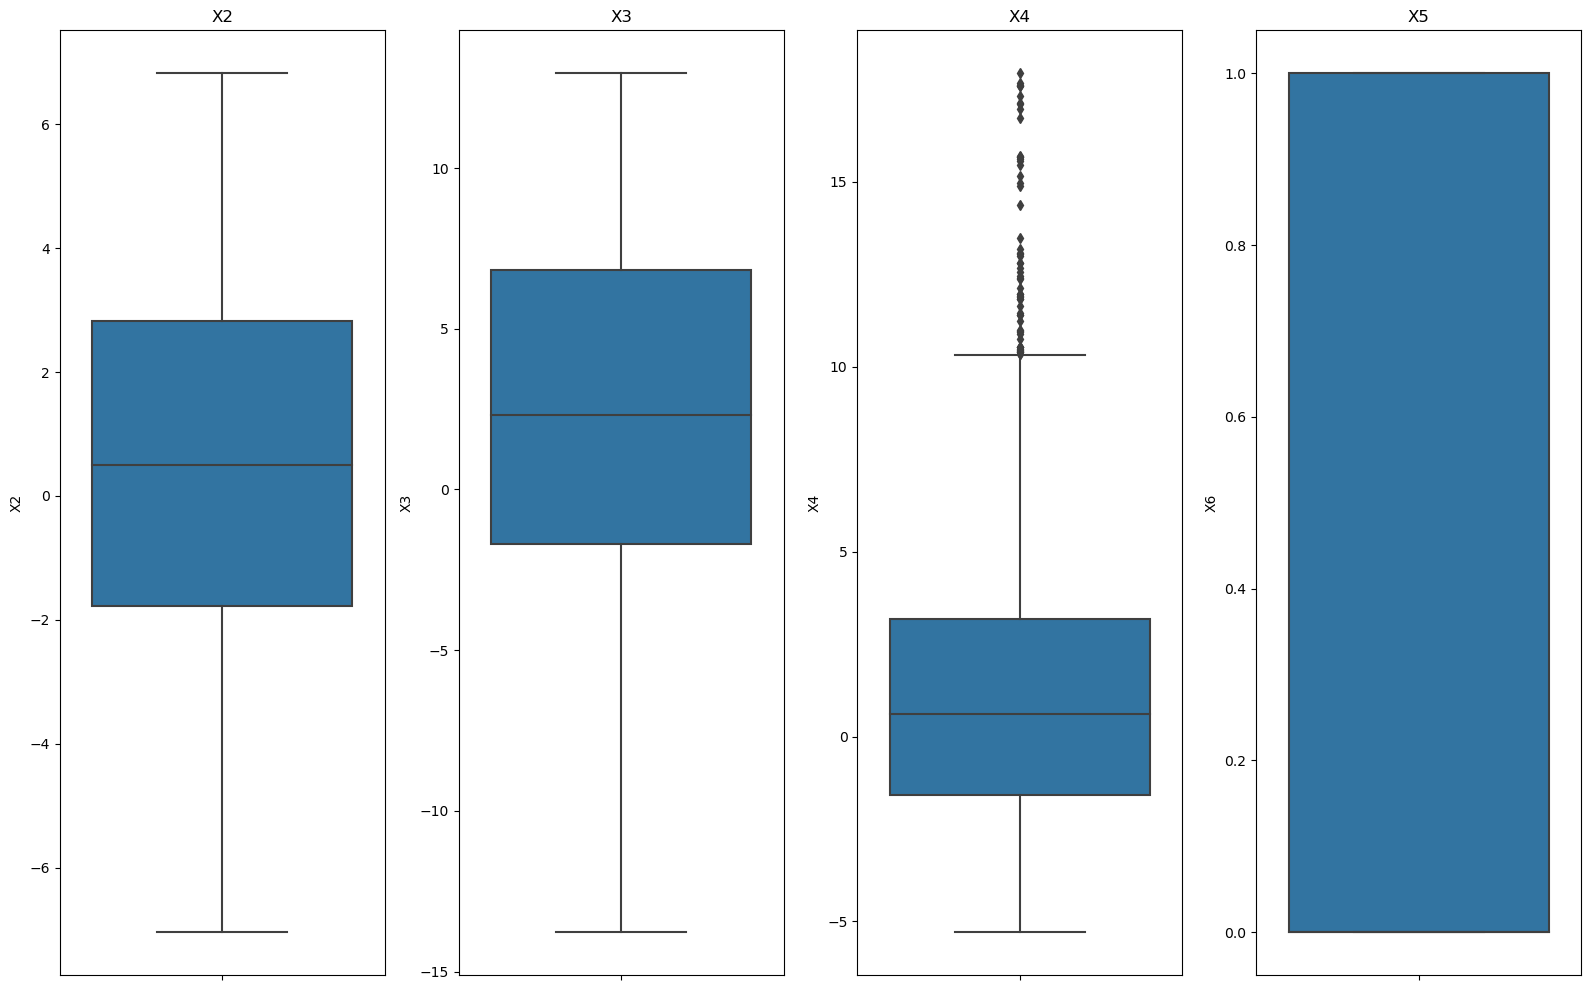

In [33]:
plt.figure(figsize = (20,10))
cols=['X2','X3','X4','X6']
for i in range(len(cols)):
    plt.subplot(1,5, i + 1)
    sns.boxplot(y = df[cols[i]], data = df, hue='X6')
    plt.title('Boxplot of {}'.format(cols[i]))
    plt.title(feature_list[i])
    plt.tight_layout()

In [34]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [35]:
for i in cols:
    if i!= 'X6':
        LL,UL=remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

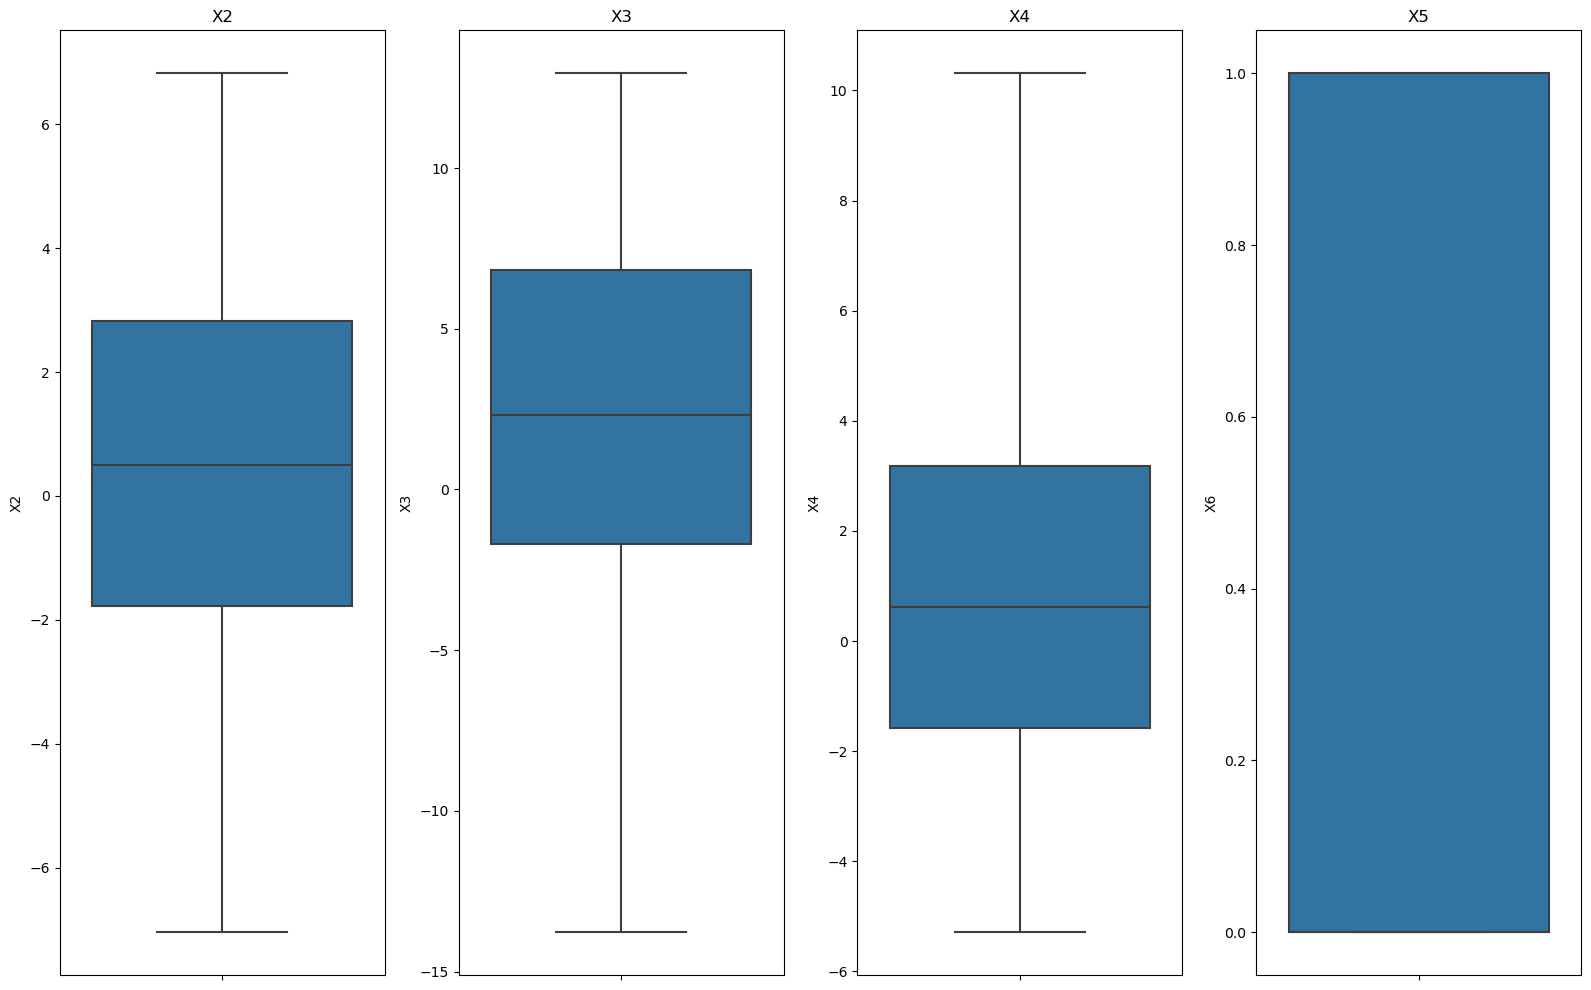

In [36]:
plt.figure(figsize = (20,10))
cols=['X2','X3','X4','X6']
for i in range(len(cols)):
    plt.subplot(1,5, i + 1)
    sns.boxplot(y = df[cols[i]], data = df, hue='X6')
    plt.title('Boxplot of {}'.format(cols[i]))
    plt.title(feature_list[i])
    plt.tight_layout()

## Model

### Split Data

In [13]:
X=df.drop(['X6'], axis=1)
Y=df['X6']
#X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size= .3, random_state= 7)

### Logistic Regression

In [14]:
model =LogisticRegression(max_iter=1000)

In [15]:
model.fit(X,Y)
y_predict = model.predict(X)

### Model Score Test

In [16]:
model_score_test = model.score(X, Y)
print('Accuracy Score is ',model_score_test)

Accuracy Score is  0.8411078717201166


### Model Score Train

In [45]:
model_score_train = model.score(X_train,y_train)
print('Accuracy Score is ',model_score_train)

Accuracy Score is  0.8354166666666667


## Evaluation

### Confusion matrix Test Data

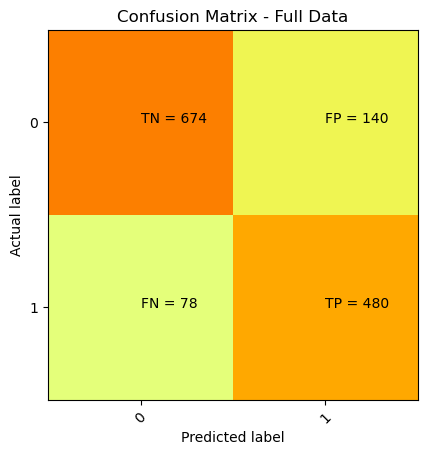

In [17]:
cm = metrics.confusion_matrix(Y, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Full Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [27]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))

Confusion Matrix 
 [[217  36]
 [ 19 140]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       253
           1       0.80      0.88      0.84       159

    accuracy                           0.87       412
   macro avg       0.86      0.87      0.86       412
weighted avg       0.87      0.87      0.87       412



In [38]:
ytest_predict_prob = model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.944227,0.055773
1,0.781608,0.218392
2,0.851883,0.148117
3,0.238625,0.761375
4,0.905890,0.094110


### Train

In [41]:
ytrain_predict_prob = model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.843600,0.156400
1,0.890480,0.109520
2,0.412604,0.587396
3,0.151399,0.848601
4,0.870229,0.129771


### ROC Curve

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
probs=model.predict_proba(X)

In [20]:
probs=probs[:,1]

### AUC

In [21]:
auc = roc_auc_score(Y,probs)
print('AUC: ', auc)

AUC:  0.8517245251116219


### ROC Curve

In [55]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)

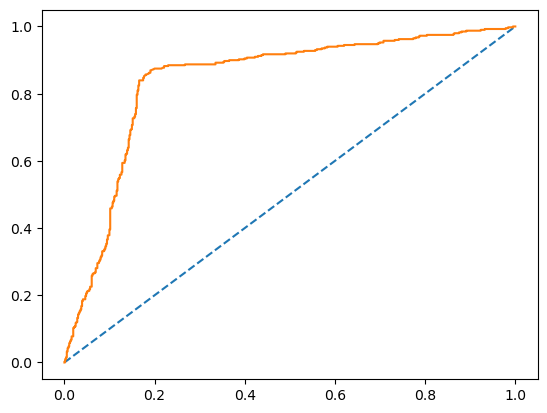

In [56]:
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(train_fpr, train_tpr);

### Model Intercept

In [22]:
# Get the value of the intercept
intercept = model.intercept_
print("The value of the intercept is:", intercept)

The value of the intercept is: [0.72969229]


### Probability Question

The logistic regression model can be rewritten as:

P(Y=1) / P(Y=0) = e^(9.5 - 0.3Age + 0.57MinorInjury)

where e is the base of the natural logarithm.

If we set MinorInjury = 0 and Age = 40, we get:

P(Y=1) / P(Y=0) = e^(9.5 - 0.3*40) = e^(-2.5)

Taking the reciprocal of both sides, we get:

P(Y=0) / P(Y=1) = e^2.5

We know that the sum of probabilities of Y=0 and Y=1 is 1. Therefore,

P(Y=0) + P(Y=1) = 1

Solving for P(Y=0), we get:

P(Y=0) = 1 / (1 + P(Y=1))

Substituting P(Y=0) / P(Y=1) = e^2.5, we get:

P(Y=0) = 1 / (1 + e^(2.5))

Using a calculator or Python, we can compute this probability to be approximately 0.0758, or 7.58%.

The complement of P(Y=0) 92.42% i.e., 100% - 7.58%%.





